In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=1000, noise=0.07, random_state=42)

In [3]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [4]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [5]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

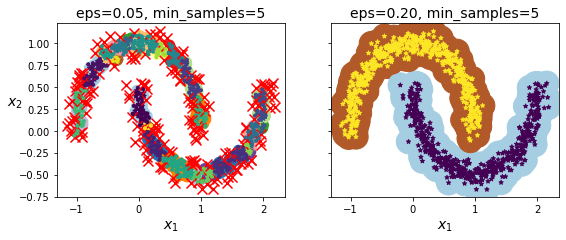

In [6]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

# save_fig("dbscan_plot")
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
silhouette_score(X, dbscan.labels_)

0.1178597460195623

In [9]:
silhouette_score(X, dbscan2.labels_)

0.3315960676132281

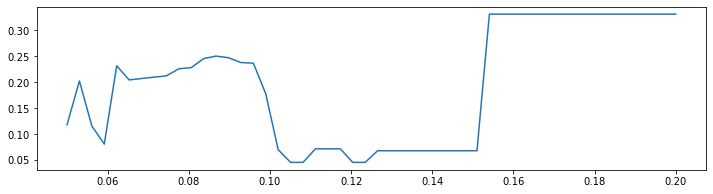

In [10]:
sil_scores = []

x = np.linspace(0.05, 0.2, 50)

for eps in x:
    
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X)
    sil_scores.append(silhouette_score(X, dbscan.labels_))

plt.figure(figsize=(12,3))
plt.plot(x,sil_scores)

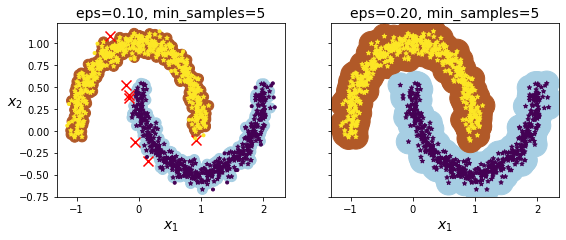

In [11]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

# save_fig("dbscan_plot")
plt.show()

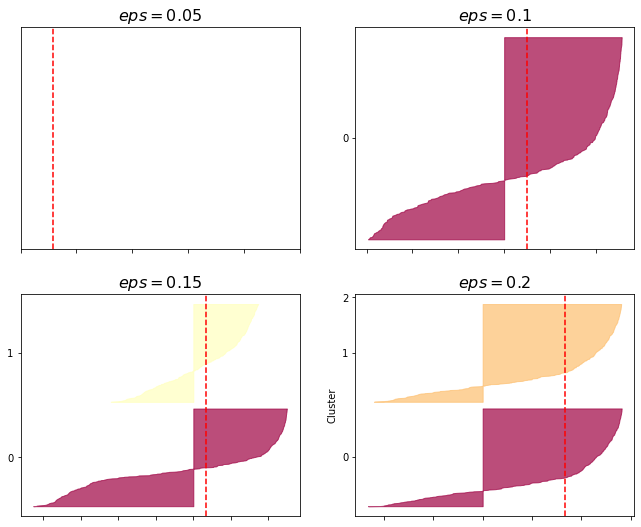

In [12]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

eps = [0.05, 0.1, 0.15, 0.2]

for k in range(len(eps)):
    plt.subplot(2, 2, k + 1)
    
    dbscan = DBSCAN(eps=eps[k], min_samples=5)
    dbscan.fit(X)
    
    y_pred = dbscan.labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_score(X, dbscan.labels_), color="red", linestyle="--")
    plt.title("$eps={}$".format(eps[k]), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()